In [1]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import cifar10 

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1656s 10us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

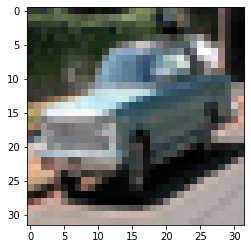

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[32])

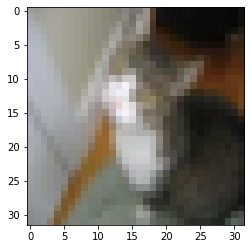

In [7]:
plt.imshow(X_train[101])

### PreProcessing

In [8]:
X_train.max()

255

In [9]:
X_train.min()

0

In [10]:
X_train = X_train/255
X_test  = X_test /255

### Labels

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train[32]

array([1], dtype=uint8)

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
y_cat_test  = to_categorical(y_test ,10)

In [16]:
y_cat_train[32]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building the model

In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

#output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [21]:
#EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [23]:
model.fit(X_train,y_cat_train,epochs=15,validation_split=0.2,callbacks=[early_stop])

Epoch 1/15
1250/1250 [==============================] - 24s 19ms/step - loss: 1.5779 - accuracy: 0.4341 - val_loss: 1.3038 - val_accuracy: 0.5375
Epoch 2/15
1250/1250 [==============================] - 27s 22ms/step - loss: 1.2072 - accuracy: 0.5768 - val_loss: 1.2610 - val_accuracy: 0.5621
Epoch 3/15
1250/1250 [==============================] - 28s 22ms/step - loss: 1.0471 - accuracy: 0.6350 - val_loss: 1.1045 - val_accuracy: 0.6227
Epoch 4/15
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9365 - accuracy: 0.6752 - val_loss: 1.0891 - val_accuracy: 0.6342
Epoch 5/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.8448 - accuracy: 0.7092 - val_loss: 0.9714 - val_accuracy: 0.6814
Epoch 6/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.7703 - accuracy: 0.7350 - val_loss: 1.0225 - val_accuracy: 0.6646
Epoch 7/15
1250/1250 [==============================] - 27s 22ms/step - loss: 0.7011 - accuracy: 0.7602 - val_loss: 1.0920 -

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses.head(2)

,loss,accuracy,val_loss,val_accuracy
0,1.577877,0.434125,1.303842,0.5375
1,1.207217,0.576775,1.260988,0.5621


<AxesSubplot:>

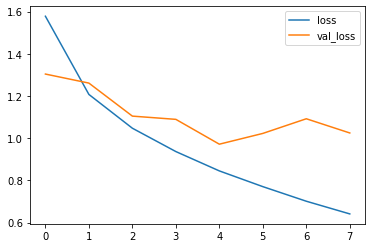

In [26]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

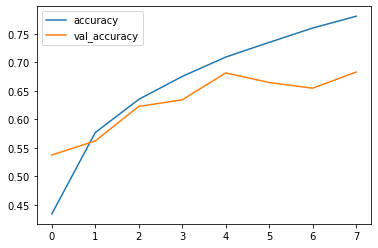

In [27]:
losses[['accuracy','val_accuracy']].plot()

In [28]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.9738498330116272, 0.6747999787330627]

### Classification Report and Confusion Matrix

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.65      0.71      1000
           1       0.80      0.80      0.80      1000
           2       0.57      0.59      0.58      1000
           3       0.58      0.36      0.44      1000
           4       0.62      0.63      0.62      1000
           5       0.58      0.55      0.56      1000
           6       0.61      0.88      0.72      1000
           7       0.74      0.71      0.73      1000
           8       0.75      0.82      0.78      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [31]:
print(confusion_matrix(y_test,predictions))

[[654  27  73   9  24   6  26  12 121  48]
 [ 18 797   9   6   4   7  27   3  28 101]
 [ 44   6 589  27  89  73 107  37  18  10]
 [ 23  14  77 359  90 187 160  38  29  23]
 [ 15   5  80  38 629  29 107  73  17   7]
 [  9   3  91 113  66 548  84  58  13  15]
 [  2   4  40  23  23  13 880   5   4   6]
 [ 11   4  41  25  78  68  24 713   6  30]
 [ 53  38  18   8   8   7  13   5 816  34]
 [ 26  97  13   9   9   8  21  19  35 763]]


### Predicting an image

In [37]:
my_choice_image = X_test[77]

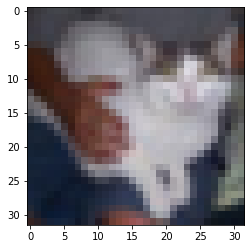

In [38]:
plt.imshow(my_choice_image)

In [39]:
model.predict_classes(my_choice_image.reshape(1,32,32,3))

array([3], dtype=int64)

In [40]:
#3 is Cat

In [43]:
'''
Classes:
0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck
'''

'\nClasses:\n0 : airplane\n1 : automobile\n2 : bird\n3 : cat\n4 : deer\n5 : dog\n6 : frog\n7 : horse\n8 : ship\n9 : truck\n'